**Wesleyan University ASTR 210**

# Homework 3

In this homework, we will import, manipulate, and visualize a set of "mock observations" of a protoplanetary disk at different wavelengths (file courtesy of Prof. Hughes).  Before you begin, make sure you have the file alma_models.fits in your data directory.

The ultimate goal you will be working towards in this homework is to create an RGB composite image of the disk in three different wavelength bands.  This will require you to:
- Read in and process data from a FITS file,
- Explore the data by visualizing the "channels" individually,
- Select the most interesting subset of the data by slicing the arrays,
- Renormalize the arrays to make an RGB image with three individual channels,
- Sum and renormalize some arrays to make an RGB image with three *sets* of channels.
- Zhuzh your visualization until it is as beautiful as you can make it.

## Import statement

**(5 points)** Import numpy as np, matplotlib.pyplot as plt, and the fits package from astropy.io. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Reading in FITS data (25 points)

**(5 points)** Open the alma_models.fits file and assign it to a variable named almadata.  Use the **relative** path to the file from here.  (That is, use a path which will work in any ASTR210 directory with the same folder structure - if your path starts with C:/ or /Users/, you are using an **absolute** path which will throw an error when I go to grade.)

In [2]:
almadata = fits.open('../data/alma_models.fits')# YOUR CODE HERE

**(5 points)** Take a look at the structure of the data with the info() function.

In [3]:
almadata.info()# YOUR CODE HERE

Filename: ../data/alma_models.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (512, 512, 15)   float64   


You should see that there is a single HDU, which contains a *three-dimensional* array.  Let's find out what those dimensions correspond to.

**(5 points)** Print out the header of the primary HDU.

In [4]:
almadata_header = almadata[0].header
print(almadata_header)# YOUR CODE HERE

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  512                                                  NAXIS2  =                  512                                                  NAXIS3  =                   15                                                  CDELT1  = -1.3888888888888E-05                                                  CRPIX1  =                256.5                                                  CRVAL1  =                  0.0                                                  CTYPE1  = 'RA---SIN'                                                            CDELT2  = 1.38888888888888E-05                                                  CRPIX2  =                256.5                                                  CRVAL2  =                  0.0          

The cards CTYPE1, CTYPE2, and CTYPE 3 are the names of the three axes of the array.  CTYPE1 and CTYPE2 are right ascension (RA) and declination (DEC), which are coordinates on the sky.  (If you have never heard these terms before, think of RA and DEC as x and y in our image.)

**(5 points)** Print out the value of CTYPE3, describing the third axis.

In [5]:
ctype3 = almadata_header['CTYPE3']
print(ctype3)# YOUR CODE HERE

VELO-LSR


This third dimension refers to velocity.  So, this 3D array tells us the brightness of the material in the disk not only as a function of position in the sky, but as a function of the material's *velocity with respect to the observer*.  Another term for this third axis is the brightness in different "channels."

**(5 points)** Retrieve the data array and assign it to a variable named imgarr ("image array").

In [6]:
imgarr = almadata[0].data # YOUR CODE HERE
imgarr.shape

(15, 512, 512)

Notice that the order of the dimensions unfortunately got flipped around relative to the way they appeared in the output from info(), such that the 15 different channels are now the *first* dimension of the array.

## Displaying the data (23 points)

**(4 points)** Let's take a look at the data.  Use imshow() to display the image in the first channel (index 0).  Include a color bar.

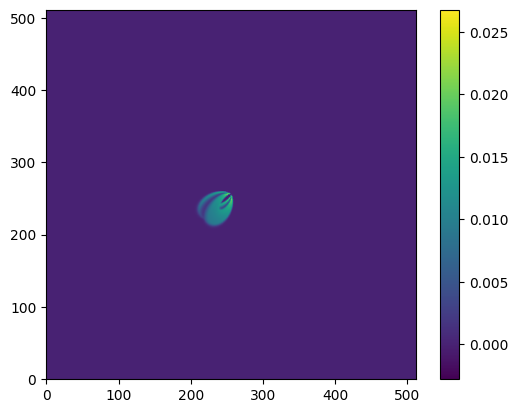

In [7]:
plt.imshow(imgarr[0,:,:], origin='lower')
plt.colorbar()# YOUR CODE HERE

**(4 points)** Now display the image in the last channel.

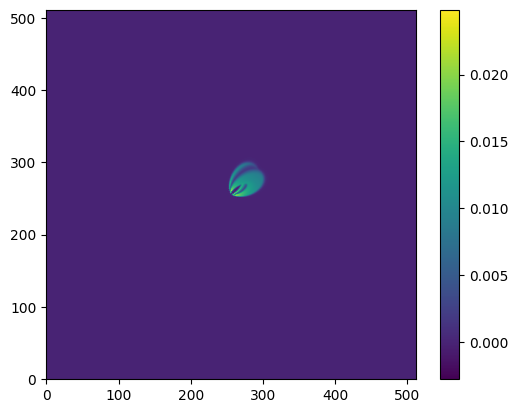

In [8]:
plt.imshow(imgarr[14,:,:], origin = 'lower')
plt.colorbar()

**(5 points)** Finally, display the image in the central channel.

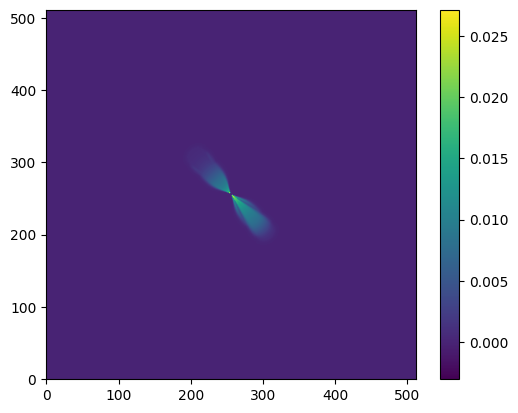

In [9]:
plt.imshow(imgarr[7, :, :], origin='lower')
plt.colorbar()

What you can see from looking at these images is that the different channels (or, velocities with respect to the observer) pick out different parts of the disk.  Because the material in the disk is orbiting around the central object, material on one side appears to be moving *towards* the observer (first channel) while material on the other side appears to be moving away (last channel).  (Material in the central channel is moving neither towards nor away from the observer.)  I encourage you to take a look at all the channels just to see how things vary.  The "data" we're using here is an idealized model, but mimics a real observational effect and is used to derive the properties of real protoplanetary disks. 

The remainder of this homework will be dedicated to constructing a visualization of this model which is as informative (and beautiful) as possible!  Some of the choices you will make here are purely aesthetic, so there is not necessarily a "right" answer.

**(10 points)** First, there is a lot of empty space around the border where there's nothing going on in the model.  We can trim away some of that empty space to "zoom in" on the central region of interest by slicing off the beginning and end of the 2nd and 3rd dimensions of imgarr.  Create a new array imgarr_trimmed which has shape (15,X,X) where X is some number less than 512, and display the central channel of this new array.  Be sure to slice symmetrically such that the image is still centered.  (The exact value of X is up to you - you want to get rid of empty space without cutting away anything interesting.)

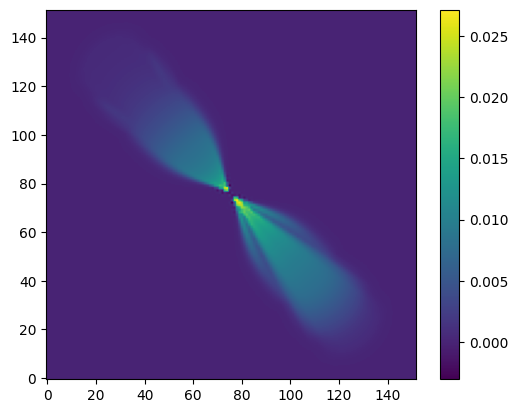

In [10]:
imgarr_trimmed = imgarr[:, 180:332, 180:332]
plt.imshow(imgarr_trimmed[7,:,:], origin = 'lower')
plt.colorbar()

## Create a composite image (45 points)

So far, we have only used imshow() to look at one image at a time, and have used a color map to convert from the values in the array to the colors of the pixels.  But there is a way to *combine* three images together (or create a **composite**) by assigning one image to Red, one to Green, and one to Blue.  The combination of the three creates a unique RGB color in each pixel.  This is the same concept behind "false color" astrophotography - you will often see people assigning (for example) an X-ray image to Blue, an optical image to Green, and a radio image to Red.

The imshow() function supports the creation of RGB composites.  Check out the documentation here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html  

To indicate that you want to make a RGB composite, the documentation says you need to pass in an array with shape "(M, N, 3): an image with RGB values (0-1 float or 0-255 int)."  So there are two things we need to do: construct that three-dimensional array, and make sure it is normalized appropriately. 

**(7 points)** Construct an array imgarr_rgb with shape (X,X,3) out of the first, central, and last channel of imgarr_trimmed.  (Hints: Remember that a 2D array is essentially a *list of lists*, while a 3D array is a *list of lists of lists*.  If you find yourself in a situation where you have an array with shape (3,X,X), you can use *transposition* to convert it to (X,X,3).)

In [11]:
imgarr_rgb = imgarr_trimmed[[0,7,14],:,:]
imgarr_rgb = imgarr_rgb.transpose()
imgarr_rgb.shape

(152, 152, 3)

As the documention mentioned, an RGB array of floats should have values that range between 0 and 1.  This is not currently true for our array,

In [12]:
print(np.min(imgarr_rgb), np.max(imgarr_rgb))

-0.0030387206188123594 0.027130015674394194


**(7 points)** Re-normalize the imgarr_rgb array so that its minimum value is 0 and its maximum value is 1.  (Hint: you can do this one step at a time.  First, what do you need to *add* to the array such that its minimum becomes 0?  Then, what do you need to *multiply* the array by such that its maximum becomes 1?

In [14]:
imgarr_rgb = imgarr_rgb - np.min(imgarr_rgb)
imgarr_rgb = imgarr_rgb / np.max(imgarr_rgb)

In [53]:
print(np.min(imgarr_rgb), np.max(imgarr_rgb))

0.0 0.9999999999999999


**(2 points)** Display your composite imgarr_rgb using imshow().

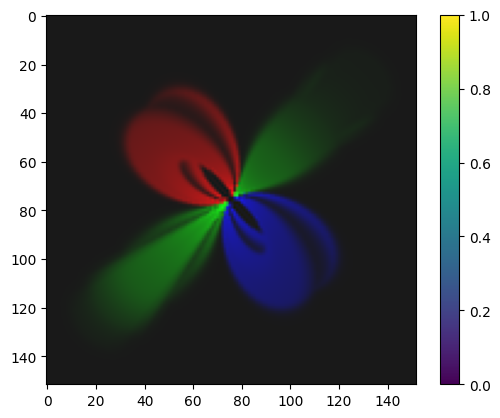

In [15]:
plt.imshow(imgarr_rgb)
plt.colorbar()# YOUR CODE HERE

This is pretty neat - if you've done it correctly you'll be able to see the red (receding) part on one side, the blue (approaching) part on the other, and the stationary (green) part in the middle.

But, we're not done yet!  We are only looking at three channels here, and there are 15 in total.  We're missing most of the information in the model!  Unfortunately, we only have three colors so we can't give each channel its own color, but we *can* at least include all the channels in either R, G, or B.  To do this, let's split them up evenly: R gets channels 0 through 4, G gets channels 5 through 9, and B gets channels 10 through 14.

**(6 points)** Remake your imgarr_rgb array, but this time use the *sum* of channels 0-4, 5-9, and 10-14.  (To be clear, here I am speaking like a human rather than like a computer - by "channels 0-4", I mean channels, 0,1,2,3 **and** 4.)

Hint: if you want to sum over just one axis of an array, you can use the "axis" keyword in the np.sum() function.  Setting axis=0 sums over the first axis, axis=1 sums over the second axis, and so on.

In [16]:
imgarr_trimmed = np.transpose(imgarr_trimmed)
imgarr_rgb[:,:,0] = np.sum(imgarr_trimmed[:, :, :5], axis=2)
imgarr_rgb[:,:,1] = np.sum(imgarr_trimmed[:, :, 5:10], axis=2)
imgarr_rgb[:,:,2] = np.sum(imgarr_trimmed[:, :, 10:15], axis=2)
#renormalize
imgarr_rgb = imgarr_rgb - np.min(imgarr_rgb)
imgarr_rgb = imgarr_rgb / np.max(imgarr_rgb)
print(np.min(imgarr_rgb), np.max(imgarr_rgb))

0.0 1.0


**(4 points)** Display the resulting composite.  (Remember to renormalize imgarr_rgb if you haven't already.)

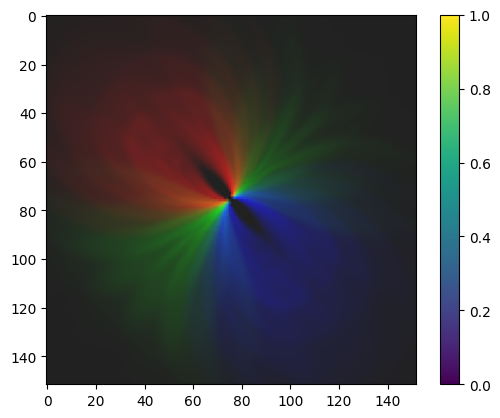

In [17]:
plt.imshow(imgarr_rgb)
plt.colorbar()

Now that we're including all the channels, the distribution of light is starting to look a lot more continuous!  (You can still see some edges and discontinuities, just because we have a discrete number of channels.)  The red, green, and blue regions are all pretty distinct from one another though.  We can introduce some blending between colors if we allow the R, G, and B images to overlap by a few channels.  

**(6 points)** Reconstruct imgarr_rgb, and redisplay the image, using the sum of channels 0-6, 5-11, and 8-14.  (You should just be able to copy your code from above and change a couple of numbers at this point.)

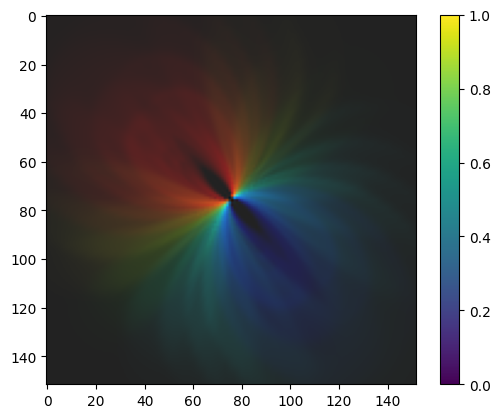

In [18]:
imgarr_rgb[:,:,0] = np.sum(imgarr_trimmed[:, :, :7], axis=2)
imgarr_rgb[:,:,1] = np.sum(imgarr_trimmed[:, :, 5:12], axis=2)
imgarr_rgb[:,:,2] = np.sum(imgarr_trimmed[:, :, 8:15], axis=2)
#renormalize
imgarr_rgb = imgarr_rgb - np.min(imgarr_rgb)
imgarr_rgb = imgarr_rgb / np.max(imgarr_rgb)

plt.imshow(imgarr_rgb)
plt.colorbar()

Now you should start to see yellow and cyan creeping into the image as the color transitions between red, green, and blue.

The final trick we can employ is to let the brightest pixels saturate in order to bring out more detail at lower brightnesses.  (This is similar to the exercise of moving the limits of the color bar that we did in the tutorial.)  To do this, we can normalize imgarr_rgb to a slightly higher value and allow the brightest pixels to exceed 1.  The imshow() function will "clip" those pixels back down to 1, but the lower-brightness pixels will still appear brighter.

**(4 points)** Re-normalize imgarr_rgb such that its highest value is 1.5, and re-display the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5..1.5].


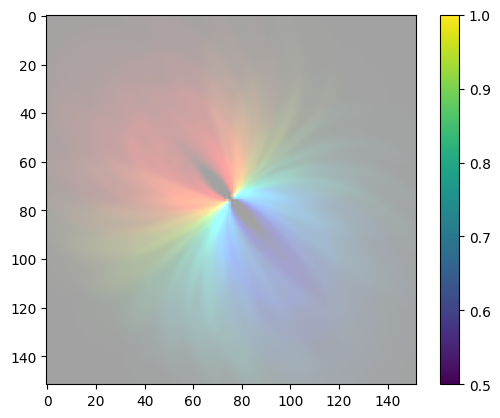

In [19]:
imgarr_rgb += 0.5
plt.imshow(imgarr_rgb)
plt.colorbar()

As you can see, the image is brighter overall and you can see more detail, and we haven't lost much information by clipping those highest-value pixels.

**(7 points)** Now you have learned many of my visualization tricks!  Play with the amount of trimming, normalization of pixel values, and amount of overlap between R, G, and B (and/or employ any other tricks you can think of) to produce the most beautiful and informative image you can, below.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.3..1.3].


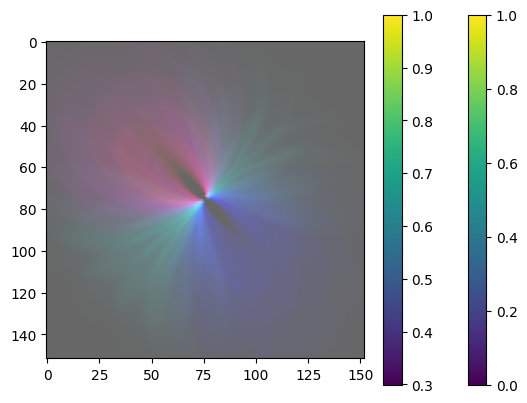

In [20]:

imgarr_rgb[:,:,0] = np.sum(imgarr_trimmed[:, :, :5], axis=2)
imgarr_rgb[:,:,1] = np.sum(imgarr_trimmed[:, :, 5:10], axis=2)
imgarr_rgb[:,:,2] = np.sum(imgarr_trimmed[:, :, 2:15], axis=2)
#renormalize to 0 and 1
imgarr_rgb = imgarr_rgb - np.min(imgarr_rgb)
imgarr_rgb = imgarr_rgb / np.max(imgarr_rgb)

plt.imshow(imgarr_rgb)
plt.colorbar()


imgarr_rgb += .3
plt.imshow(imgarr_rgb)
plt.colorbar()

**(2 points)** Give me another 1-5, how difficult was this assignment?  (Were there any parts that were especially fun, frustrating, or unclear?)

In [ ]:
'''
4-Compared to the first two, this was the most challenging. I have never worked with arrays this way before and renormalizing was a bit new to me. it was challenging but also fun
'''